<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/0302_exercises_skyline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions to 3-HojaEjercicios

some solitions at least

In [2]:
import numpy as np
import numpy.random as nrnd

## Ejercicio 1: Elemento máximo de un arreglo

#### Escriba un algoritmo “simple” para calcular este problema.

In [5]:
# there is a built in function for this: max(lst)

def simple(lst) -> float:
    maximum = lst[0]
    for i in range(1, len(lst)):
        if lst[i] > maximum:
            maximum = lst[i]

    return maximum

n = 1000
arr = nrnd.rand((n))
assert simple(arr) == max(arr)
print("all good")
%timeit simple(arr)

all good
174 µs ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Escriba un algoritmo “divide y vencerás” para calcular este problema.

In [8]:
def maxdc(lst) -> float:
    n = len(lst)

    def solve(i, f):
        if i == f:
            return lst[i]
        m = (i + f) // 2
        maxl = solve(i, m)
        maxr = solve(m+1, f)
        return maxl if maxl > maxr else maxr

    return solve(0, n-1)

n = 1000
arr = nrnd.rand((n))
assert maxdc(arr) == max(arr)
print("all good")
%timeit maxdc(arr)

all good
492 µs ± 8.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%timeit max(arr)
%timeit arr.max()

90.8 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.16 µs ± 482 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Ejercicio 2: Contador palabras

Dado un texto t de n líneas, implementar un algoritmo “divide y vencerás” que cuente el número de palabras que contiene dicho texto.

Nota: Problema inicial para el algoritmo MapReduce de Google (fundamental e n Big Data).

In [40]:
%%file lorem.txt
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas faucibus elit a erat semper finibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Nunc id nisl ac velit vulputate pretium. Nullam eget orci eget sapien commodo pulvinar sed at nulla. Morbi ut nunc nec ex ornare finibus. Nunc varius venenatis dignissim. Vivamus eu scelerisque neque. Suspendisse tincidunt ex leo, dictum convallis enim pulvinar aliquam. Nulla ultrices est a velit iaculis pretium. Curabitur a fringilla nunc. Curabitur quis ligula in purus tristique tincidunt. Morbi ac urna massa. Suspendisse potenti.

Maecenas non lectus nisi. Sed non cursus nisi, a ultricies urna. Aliquam leo dolor, dapibus eu nunc eu, lobortis iaculis elit. Ut accumsan gravida leo eu gravida. Cras eu ullamcorper ex. Duis tellus metus, viverra sed ante ut, fringilla convallis nisl. Fusce venenatis orci eget sollicitudin suscipit. Etiam non pretium turpis, vitae fringilla diam.

Suspendisse feugiat, odio in finibus malesuada, lorem lorem commodo lorem, quis condimentum justo purus quis ante. Quisque arcu nulla, congue sit amet est sed, scelerisque fermentum nulla. Nam suscipit tincidunt quam, nec vehicula quam fringilla quis. Nulla porttitor risus eros, vitae lacinia neque mollis at. Curabitur finibus arcu non elit dignissim, eget accumsan purus malesuada. Integer rhoncus nisl nec nibh ultricies ornare. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; In viverra nunc lectus. Mauris sed nulla felis. Maecenas eleifend consectetur turpis a tempus. Fusce sagittis gravida suscipit. Morbi vehicula ligula vel tincidunt fringilla. Ut venenatis tempor laoreet. Suspendisse in arcu in justo sagittis condimentum. Duis rhoncus ipsum urna, venenatis eleifend quam auctor nec. Praesent sem eros, ultrices in ante vitae, pulvinar vehicula leo.

Fusce et sapien vehicula, fermentum nulla vel, aliquet felis. Mauris finibus elementum dolor id semper. Aenean aliquam nisi risus, vel auctor lectus malesuada eu. Maecenas ullamcorper arcu varius nulla tempor accumsan. Suspendisse posuere, elit ut dapibus semper, odio lorem venenatis turpis, vitae mollis libero mauris eget nibh. Phasellus id turpis luctus, ultrices leo id, tempus mi. Quisque est mi, pretium at dolor non, vehicula tincidunt orci. Pellentesque sed viverra tortor, vel iaculis urna. Sed a elit tincidunt lorem efficitur scelerisque. Vestibulum sed diam elementum, dapibus nisi nec, rhoncus arcu. Fusce ut accumsan tellus, eu vulputate justo. Sed ac lacinia diam. Ut cursus mi in ex malesuada faucibus. Fusce tempus pulvinar nulla sed rutrum.

Morbi id ipsum quis lacus lobortis gravida. Suspendisse in convallis augue. Donec id urna ut odio ornare fermentum vel eu sapien. Aliquam laoreet magna consectetur, interdum nisl ut, interdum odio. Mauris quis accumsan tortor. Suspendisse magna enim, placerat eu egestas ac, condimentum at purus. In blandit ultricies elit a porta. Integer lacus velit, finibus et tempus ut, consequat sit amet tellus. In eu lacus elit. In sagittis nulla ut hendrerit cursus. Duis est mauris, semper gravida imperdiet vel, consectetur sit amet tortor. In odio lectus, dapibus nec mauris at, fringilla ultrices metus.

Cras porta porta cursus. Maecenas eu finibus ante. Ut quis imperdiet eros, cursus vulputate nisl. Quisque velit libero, mattis et quam at, commodo auctor velit. Praesent eleifend est augue. Etiam efficitur ligula rutrum orci laoreet, quis tincidunt orci scelerisque. Aliquam dapibus arcu ipsum, non finibus mauris cursus sodales. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse potenti. Nam maximus iaculis commodo. Proin tempus sem in sollicitudin lacinia. In venenatis ut leo at rhoncus.

Fusce in ullamcorper urna. Duis consequat mi odio, mollis interdum mauris consectetur et. Vivamus dictum, massa vitae egestas malesuada, massa tortor vulputate mi, eget pellentesque tellus eros ut leo. Nam mollis libero quis dignissim feugiat. Sed at libero nunc. Aenean non magna sit amet ligula posuere maximus a ac nibh. Nam id lacinia nulla. Praesent dolor est, iaculis vitae massa quis, semper dictum justo. Aenean eu suscipit massa, quis finibus metus. Cras rutrum lorem id augue lobortis feugiat. Pellentesque tempor, est quis gravida finibus, libero felis scelerisque leo, a fermentum massa lectus egestas tellus. Mauris tortor lorem, imperdiet in urna vel, lacinia malesuada leo.

Aliquam erat volutpat. Cras laoreet ultricies cursus. Sed vel justo mattis, porttitor arcu nec, euismod libero. Quisque non consectetur leo. Fusce dui ipsum, pulvinar eu leo sed, sollicitudin lobortis sem. Etiam pretium ipsum mi, ac elementum tellus suscipit in. Nunc vehicula tincidunt neque, et elementum dolor blandit sed. Maecenas sem odio, malesuada at ipsum id, convallis faucibus urna.

In hac habitasse platea dictumst. Sed id accumsan augue, sit amet elementum tortor. Cras interdum, sapien in interdum pulvinar, erat odio imperdiet nunc, eu pulvinar arcu turpis id quam. Nulla et aliquam lectus. In eu mattis arcu. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus sed ipsum iaculis, rhoncus mauris porttitor, convallis lorem. Mauris nec nibh feugiat, mattis neque eu, dictum ipsum. Vestibulum vel mauris at est consectetur interdum vitae sit amet felis. Suspendisse potenti. Morbi dui metus, fermentum tincidunt posuere et, tempor eu magna. Integer at hendrerit orci. Aliquam erat volutpat. Aliquam erat volutpat.

Etiam at varius elit. Proin sodales, dolor et rutrum suscipit, leo dui vehicula odio, et ornare libero magna at augue. Vivamus vulputate consequat sapien, semper dignissim odio porta id. Pellentesque metus sem, consectetur ac rhoncus quis, molestie quis ante. Aliquam efficitur varius quam, eget semper elit dapibus cursus. Pellentesque arcu libero, rhoncus sed semper eu, sagittis nec nulla. Etiam ut dui nulla. Aenean eget justo eleifend justo vulputate elementum vitae commodo odio. Vivamus eget libero a lorem ultricies tincidunt.

In vitae eros luctus, dignissim purus vitae, dictum orci. Donec id luctus lectus, sit amet rutrum arcu. Quisque sit amet placerat felis. Aenean vitae augue odio. Nulla commodo vulputate pretium. Etiam in mauris at est lobortis sagittis ac et sem. In at facilisis nunc. Pellentesque varius pharetra aliquet. Mauris sagittis lectus ac leo convallis, vel mattis ex pretium. Ut et est vel sem molestie porttitor at quis velit. Suspendisse consequat enim sem, vel tincidunt ipsum varius at.

Maecenas in imperdiet enim. Quisque mattis augue at lectus mattis, sed tempus magna volutpat. Curabitur rhoncus a ligula ac fringilla. Praesent sit amet odio ac risus tincidunt consectetur. Nunc aliquet leo eros, at lobortis.

Writing lorem.txt


In [42]:
with open("lorem.txt") as f:
    corpus = f.readlines()

len(corpus)

23

In [45]:
"si yo tengo una cadena    así por ejemplo".split()

['si', 'yo', 'tengo', 'una', 'cadena', 'así', 'por', 'ejemplo']

In [48]:
def countWords(line):
    return len(line.split())

In [49]:
def handleLines(lines):
    n = len(lines)

    def process(i, f):
        if i == f:
            return countWords(lines[i]) if len(lines[i].strip()) > 0 else 0

        m = (i + f) // 2
        return process(i, m) + process(m+1, f)

    return process(0, n-1)

handleLines(corpus)

1000

## Ejercicio 4: Skylines

Un problema c l á si co para sobreponer imá g e n e s es la eliminación de las líneas ocultas. En el caso en
2D el objetivo es de dibujar el skyline de una ciudad. Para simplificar, supongamos que todos los edificios
corresponden (por proyección) a rectángulos que comparten toda la misma base (i.e. la ciudad es plana). Un
edificio es una tripleta `(g, h, d)`, `d > g ≥ 0, h ≥ 0` que representa al rectángulo `(g, 0), (g, h), (d, h), (d, 0)`. Por
ejemplo, para 6 edificios dados por `(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)` (ver la
figura 1a), el skyline obtenido será dado por la figura 1b.

In [9]:
import matplotlib.pyplot as plt

In [10]:
rects = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]

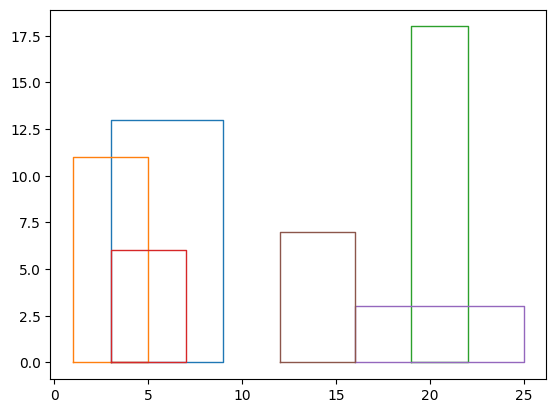

In [26]:
def drawRect(rect, line='-', lw=1.0):
    g, h, d = rect
    points = [(g, 0), (g, h), (d, h), (d, 0), (g, 0)]
    x, y = zip(*points)
    plt.plot(x, y, line, linewidth=lw)

for rect in rects:
    drawRect(rect)

In [29]:
def getContourFromRect(rect):
    g, h, d = rect
    return [(g, h), (d, 0)]

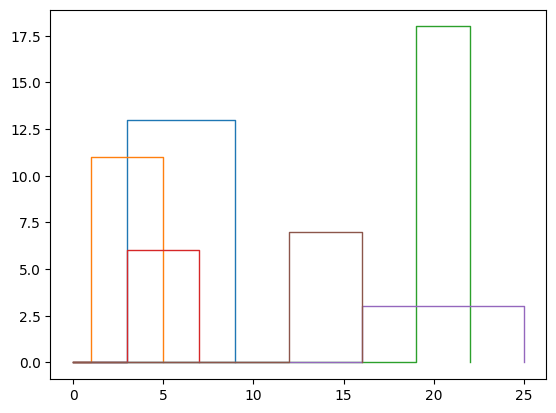

In [33]:
def drawContour(contour, line='-', lw=1.0):
    points = [(0, 0)]
    for x, y in contour:
        points.append((x, points[-1][1]))
        points.append((x, y))
    x, y = zip(*points)
    plt.plot(x, y, line, linewidth=lw)

for rect in rects:
    drawContour(getContourFromRect(rect))

In [36]:
def addPoint(contour, x, y):
    if len(contour) > 0:
        if contour[-1][1] == y:
            return
        elif contour[-1][0] == x:
            y0 = contour[-1][1]
            contour[-1] = (x, max(y, y0))
            return

    contour.append((x, y))


def merge(contour1, contour2):
    contour = []
    n1, n2 = len(contour1), len(contour2)
    i1, i2 = 0, 0
    y1, y2 = 0, 0
    while i1 < n1 or i2 < n2:
        if i1 >= n1 or i2 < n2 and contour2[i2][0] < contour1[i1][0]:
            x, y2 = contour2[i2]
            i2 += 1
        else:
            x, y1 = contour1[i1]
            i1 += 1
        y = max(y1, y2)
        addPoint(contour, x, y)

    return contour

def skyline(rects):
    n = len(rects)

    def solve(i, f):
        if i == f:
            return getContourFromRect(rects[i])
        m = (i + f) // 2
        contour1 = solve(i, m)
        contour2 = solve(m+1, f)
        return merge(contour1, contour2)

    return solve(0, n-1)

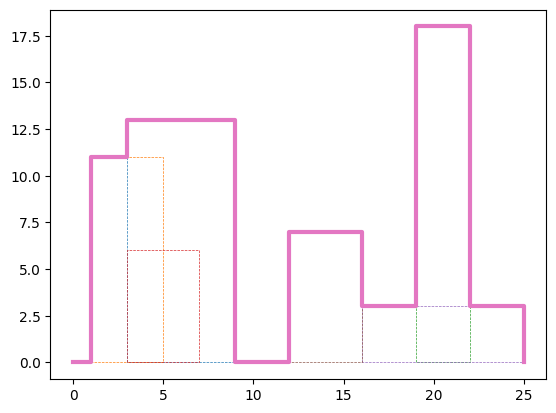

In [50]:
for rect in rects:
    drawRect(rect, '--', 0.5)
drawContour(skyline(rects), lw=3)